# SuperFluid Dark Matter

## Imports

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import traceback
import seaborn as sns
from scipy.integrate import quad
from scipy.optimize import curve_fit
from scipy.misc import derivative
from astropy import units as u
from astropy import constants as c
from sympy import *
from My_Galaxy_2 import Galaxy


In [2]:
G=c.G.value
G

6.6743e-11

In [3]:
#self.sopt[0]

## Code

In [4]:
def read_dat(filename):
    head = []
    with open(filename, 'r') as f:
        for i in range(3):
            head.append(next(f).strip()[2:].split('\t'))

    frame = pd.read_csv(filename, sep='\t', comment='#', names=head[1])

    distance = float(head[0][0].split()[2])
    distance_units = head[0][0].split()[3]

    units = head[2]

    data = {
        'frame': frame,
        'feature_names': head[1],
        'feature_units': units,
        'distance': distance,
        'distance_units': distance_units
    }

    return data

example_data = read_dat("/home/elijah-k2/Masters/Code/Rotation-Curves-master/Rotmass/Rotmass/NGC0247_rotmass.dat")
example_df = example_data["frame"]
print(example_df.head())  # Check if data is loaded correctly

try:
    IC = Galaxy(example_df)
    print("Galaxy object created successfully")
except Exception as e:
    print(f"Error creating Galaxy object: {e}")
    traceback.print_exc()

rad = IC.rad#*1e3
print("Radius values:", rad)


    Rad  Vobs  errV  Vgas  Vdisk  Vbul  SDgas  SDdisk  SDbul
0  1.08  34.6   0.9  2.57  22.19   0.0   4.22   66.02    0.0
1  1.61  47.0   0.8  3.73  29.64   0.0   4.20   54.33    0.0
2  2.15  59.1   3.1  4.89  34.48   0.0   4.21   44.47    0.0
3  2.70  64.4   1.4  6.22  38.21   0.0   4.25   37.92    0.0
4  3.22  67.4   2.3  7.63  41.40   0.0   4.27   33.35    0.0
Bulge Fit Parameters: [-9.95072407e-21  9.99997876e-01]
Gas Fit Parameters: [ 3.73047479e+01 -1.65309610e+00  1.18084757e+00 -3.03506798e-01
  3.18239286e-02  1.36470296e+00]
Disk Fit Parameters: [93.97053996  3.67280121]
Velocity Fit Parameters: [15.]
Galaxy object created successfully
Radius values: [ 1.08  1.61  2.15  2.7   3.22  3.77  4.31  4.85  5.38  5.92  6.46  6.99
  7.53  8.07  8.62  9.14  9.69 10.23 10.76 11.3  11.84 12.38 12.91 13.48
 14.01 14.54]


In [5]:
mass = IC.mass_dissk
print(mass)

[1663.3813901114904, 3633.640277532705, 6063.470494423413, 8810.477696525179, 11547.701449204285, 14499.65044654139, 17386.054721377783, 20209.46658227613, 22883.80065676493, 25484.77295447866, 27944.09306532507, 30210.54954927879, 32365.16301915338, 34363.21796589084, 36239.97072468588, 37871.9530464265, 39453.87128420709, 40870.207192092195, 42136.312666331025, 43308.21494047592, 44369.34100640323, 45328.07505581724, 46177.3788399322, 46997.95764370613, 47682.14304072554, 48297.200632473665]


In [6]:
v = (G*(mass/rad))**0.5
v

array([0.00032062, 0.00038812, 0.00043385, 0.00046668, 0.00048924,
       0.00050665, 0.00051888, 0.00052736, 0.00053281, 0.00053602,
       0.00053732, 0.00053709, 0.0005356 , 0.00053311, 0.00052972,
       0.00052588, 0.0005213 , 0.00051638, 0.00051124, 0.00050577,
       0.00050011, 0.00049434, 0.0004886 , 0.00048239, 0.00047661,
       0.00047085])

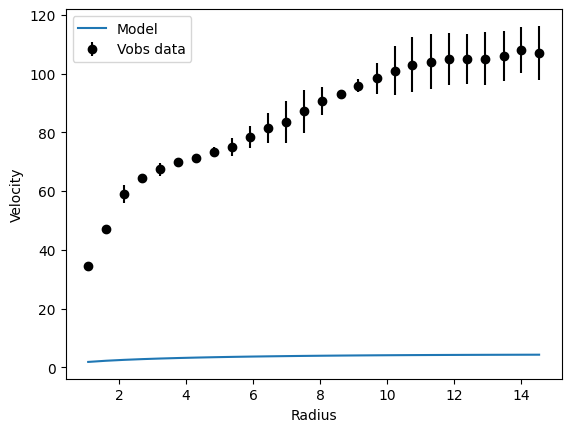

In [7]:

# Uncomment the following lines once you confirm the above steps work correctly
v_inter = IC.v_inter
vobs = IC.vobs
vobs_err = IC.vobs_err

rc = sns.lineplot(x=rad, y=v_inter, label="Model")
sns.scatterplot(x=rad, y=vobs)
rc.set_xlabel("Radius")
rc.set_ylabel("Velocity")
rc.legend()
plt.errorbar(x=rad, y=vobs, yerr=vobs_err, linestyle="none",marker="o",color="k", label="Vobs data")
plt.legend()
plt.show()
